# Import modules

In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset

In [18]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
#to display the stats about the data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
#basic info of the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#to display no. samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [21]:
#check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

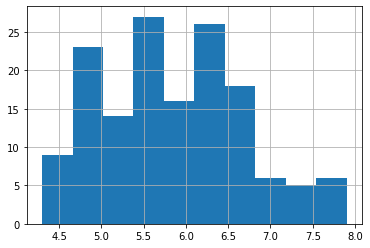

In [22]:
#Histograms
df['SepalLengthCm'].hist()

<AxesSubplot:>

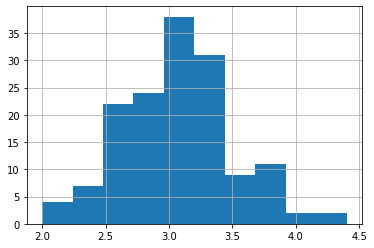

In [23]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

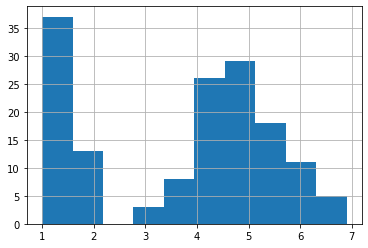

In [24]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

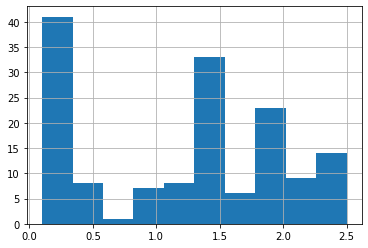

In [25]:
df['PetalWidthCm'].hist()

In [26]:
#scatterplot
colors = ['red', 'orange', 'blue']
Species = ['Iris-setosa',
'Iris-versicolor',
'Iris-virginica']

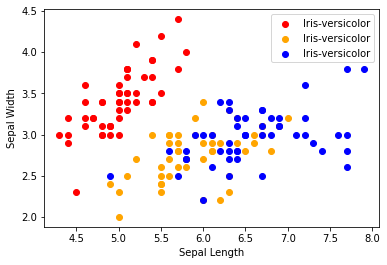

In [27]:
for i in range(3):
    x = df[df['Species']== Species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'],c = colors[i], label=Species[1])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

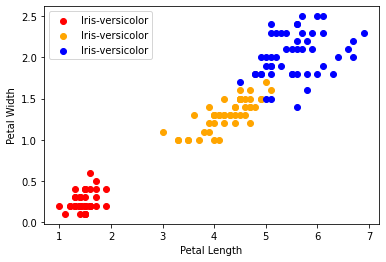

In [28]:
for i in range(3):
    x = df[df['Species']== Species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'],c = colors[i], label=Species[1])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

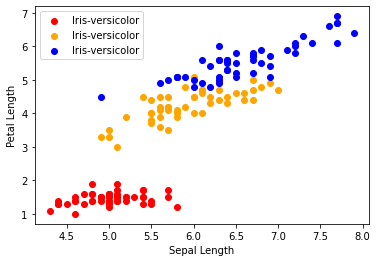

In [29]:
for i in range(3):
    x = df[df['Species']== Species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'],c = colors[i], label=Species[1])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

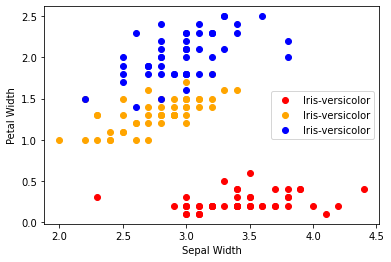

In [30]:
for i in range(3):
    x = df[df['Species']== Species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'],c = colors[i], label=Species[1])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation matrix

In [31]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

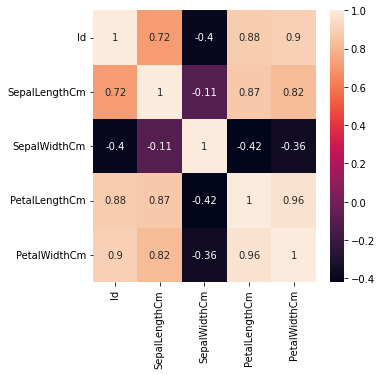

In [32]:
corr = df.corr()
fig, ax= plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

# Label Encoder

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [88]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Markdown Training

In [56]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
np.random.seed(20)
# model training
model.fit(X_train, y_train)
model.score(X_train,y_train)

1.0

In [116]:
# print metric to get performance
print("Accuracy: ",model.score(X_test, y_test) * 100)

Accuracy:  100.0


## This model gives us 100% accuracy which means that we can assume that this model can give us 100% correct predictions